# 学習済みモデルで予測を行う

この章は、おまけの章です。

## この章の内容

- 前章(4章)で行った学習済みモデル(ランダムフォレスト)を呼び出す
- 2017年の気象情報を元に、予測を行う
- 予測が正しいかどうかを、グラフ化して確認する

# 2017年1月以降の気象データを取得

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_weather2017 = pd.read_csv("data/気象庁千葉2017.csv", encoding='shift_jis', skiprows=3)

2017年1月以降の気象データを読み込みます。

以下でデータフレームの加工を行い、学習時と同じ形式にします。

In [4]:
df_weather2017.shape

(177, 30)

In [5]:
df_weather2017.head()

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2,最高気温(℃),最高気温(℃).1,最高気温(℃).2,最低気温(℃),最低気温(℃).1,最低気温(℃).2,...,降水量の合計(mm).1,降水量の合計(mm).2,降水量の合計(mm).3,日照時間(時間),日照時間(時間).1,日照時間(時間).2,日照時間(時間).3,平均風速(m/s),平均風速(m/s).1,平均風速(m/s).2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,...,現象なし情報,品質情報,均質番号,NaN,現象なし情報,品質情報,均質番号,NaN,品質情報,均質番号
2,2017/1/1,8.3,8,1,13.0,8,1,3.9,8,1,...,1,8,1,9.5,0,8,1,2.4,8,1
3,2017/1/2,8.1,8,1,13.2,8,1,4.4,8,1,...,1,8,1,5.8,0,8,1,1.6,8,1
4,2017/1/3,8.7,8,1,13.9,8,1,3.9,8,1,...,1,8,1,8.3,0,8,1,2.5,8,1


In [6]:
df_weather2017 = df_weather2017.iloc[:, [i for i, t in enumerate(df_weather2017.iloc[1, :].isnull()) if t]]

In [7]:
df_weather2017.head()

,年月日,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/1/1,8.3,13.0,3.9,51.0,36.0,1022.1,0.0,9.5,2.4
3,2017/1/2,8.1,13.2,4.4,56.0,41.0,1016.5,0.0,5.8,1.6
4,2017/1/3,8.7,13.9,3.9,48.0,27.0,1013.8,0.0,8.3,2.5


In [8]:
df_weather2017 = df_weather2017.drop([0, 1])

In [9]:
df_weather2017["年月日"] = pd.to_datetime(df_weather2017["年月日"])

In [10]:
df_weather2017 = df_weather2017.set_index("年月日")

In [11]:
df_weather2017.head()

,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
年月日,,,,,,,,,
2017-01-01,8.3,13.0,3.9,51.0,36.0,1022.1,0.0,9.5,2.4
2017-01-02,8.1,13.2,4.4,56.0,41.0,1016.5,0.0,5.8,1.6
2017-01-03,8.7,13.9,3.9,48.0,27.0,1013.8,0.0,8.3,2.5
2017-01-04,9.0,12.8,5.4,44.0,29.0,1013.4,0.0,8.6,3.6
2017-01-05,7.2,10.7,3.6,31.0,22.0,1017.5,0.0,9.4,6.3


In [12]:
df_weather2017.tail()

,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
年月日,,,,,,,,,
2017-06-20,22.7,27.9,16.7,71.0,55.0,1012.5,0.0,11.7,3.0
2017-06-21,23.3,25.5,21.3,85.0,75.0,1006.1,16.0,0.0,8.3
2017-06-22,24.8,28.8,22.2,58.0,28.0,1005.9,0.0,4.5,3.7
2017-06-23,25.0,30.4,20.5,67.0,38.0,1007.3,0.0,11.8,3.1
2017-06-24,24.7,29.3,21.6,73.0,49.0,1006.0,0.0,7.0,3.5


In [13]:
df_weather2017.shape

(175, 9)

# 学習済みモデルの呼び出し

In [14]:
from sklearn.externals import joblib

In [15]:
clf = joblib.load("clf_rf.db")

In [16]:
type(clf)

sklearn.ensemble.forest.RandomForestClassifier

# 予測

In [17]:
pred = clf.predict(df_weather2017)

In [18]:
pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

# 予測結果の可視化

In [19]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = "Source Han Code JP"
rcParams['font.weight'] = "regular"
rcParams['axes.titlesize'] = 15
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12

In [20]:
df = pd.DataFrame(pred, columns=["予測"], index=df_weather2017.index)

In [21]:
df.head()

,予測
年月日,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,1


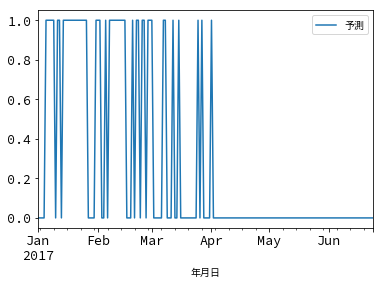

In [22]:
df.plot()

# 実際にどうだったか？

学習時に使用しなかった2017年のデータを読み込み可視化します

In [23]:
df_influ_2017 = pd.read_csv("data/201712influenza.csv", encoding="shift_jis")

In [24]:
df_2017 = pd.DataFrame(df_influ_2017.iloc[1, 1:])

In [25]:
df_2017.columns = ['報告数']

In [26]:
df_influ_2017.shape

(11, 54)

In [27]:
date_index = pd.date_range(start="2017-1-2", periods=53, freq="W-MON")

In [28]:
df_2017.index = date_index

In [29]:
df_2017.head()

,報告数
2017-01-02,7.535714286
2017-01-09,16.14285714
2017-01-16,31.35714286
2017-01-23,43.32142857
2017-01-30,37.57142857


In [30]:
df_2017.tail()

,報告数
2017-12-04,NaN
2017-12-11,NaN
2017-12-18,NaN
2017-12-25,NaN
2018-01-01,NaN


In [31]:
df_2017 = df_2017.dropna()

In [32]:
df_2017.dtypes

報告数    object
dtype: object

In [33]:
df_2017['報告数'] = df_2017['報告数'].astype(np.float32)

In [34]:
df_2017.dtypes

報告数    float32
dtype: object

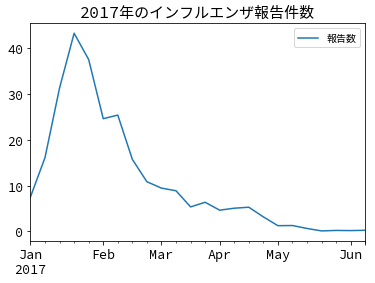

In [35]:
df_2017.plot(title="2017年のインフルエンザ報告件数")

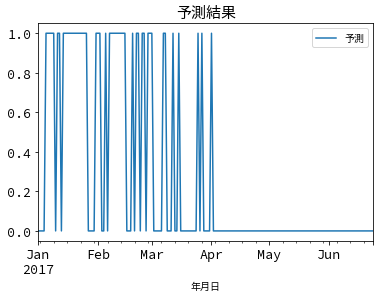

In [36]:
df.plot(title="予測結果")

In [37]:
df.shape

(175, 1)

In [38]:
df.head(10)

,予測
年月日,
2017-01-01,0
2017-01-02,0
2017-01-03,0
2017-01-04,0
2017-01-05,1
2017-01-06,1
2017-01-07,1
2017-01-08,1
2017-01-09,1


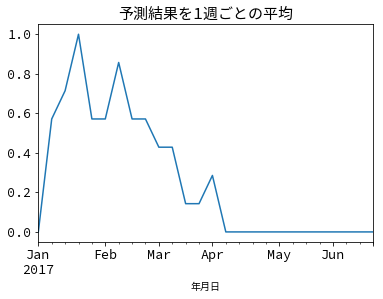

In [39]:
df.groupby(pd.Grouper(freq="w"))["予測"].mean().plot(title="予測結果を1週ごとの平均")

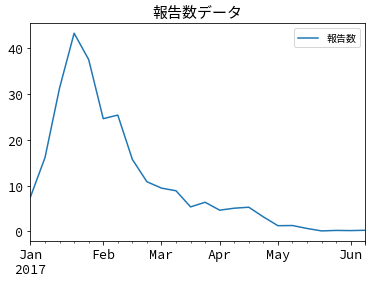

In [40]:
df_2017.plot(title="報告数データ")

In [41]:
df_weather2018 = pd.read_csv("data/気象庁千葉2018.csv", encoding='shift_jis', skiprows=3)

In [42]:
df_weather2018 = df_weather2018.iloc[:, [i for i, t in enumerate(df_weather2018.iloc[1, :].isnull()) if t]]

In [43]:
df_weather2018.head()

,年月日,平均気温(℃),最高気温(℃),最低気温(℃),平均湿度(％),最小相対湿度(％),平均現地気圧(hPa),降水量の合計(mm),日照時間(時間),平均風速(m/s)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017/1/1,8.3,13.0,3.9,51.0,36.0,1022.1,0.0,9.5,2.4
3,2017/1/2,8.1,13.2,4.4,56.0,41.0,1016.5,0.0,5.8,1.6
4,2017/1/3,8.7,13.9,3.9,48.0,27.0,1013.8,0.0,8.3,2.5


In [44]:
df_weather2018 = df_weather2018.drop([0, 1])
df_weather2018["年月日"] = pd.to_datetime(df_weather2018["年月日"])
df_weather2018 = df_weather2018.set_index("年月日")
df_weather2018.shape

(638, 9)

In [45]:
pred2018 = clf.predict(df_weather2018)

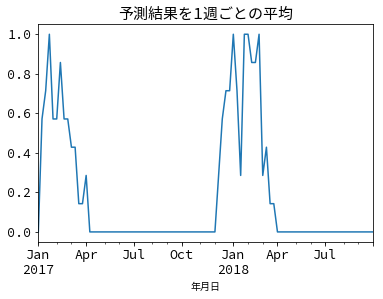

In [46]:
df_pred2018 = pd.DataFrame(pred2018, columns=["予測"], index=df_weather2018.index)
df_pred2018_mean = df_pred2018.groupby(pd.Grouper(freq="w"))["予測"].mean()
df_pred2018_mean.plot(title="予測結果を1週ごとの平均")

In [47]:
df_influ_2018 = pd.read_csv("data/201811influenza.csv", encoding="shift_jis")

In [48]:
df_2018 = pd.DataFrame(df_influ_2018.iloc[1, 1:])
df_2018.columns = ['報告数']
date_index = pd.date_range(start="2018-1-4", periods=53, freq="W-MON")
df_2018.index = date_index
df_2018 = df_2018.dropna()
df_2018['報告数'] = df_2018['報告数'].astype(np.float32)
df_2018.head()

,報告数
2018-01-08,9.230769
2018-01-15,23.892857
2018-01-22,51.142857
2018-01-29,57.821430
2018-02-05,64.500000


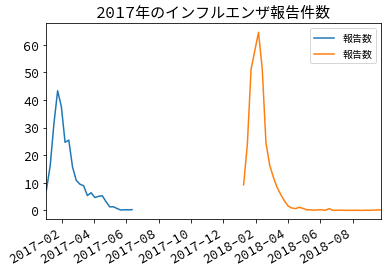

In [49]:
df_2017_2018 = pd.concat([df_2017, df_2018], axis=1)
df_2017_2018.plot(title="2017年のインフルエンザ報告件数")

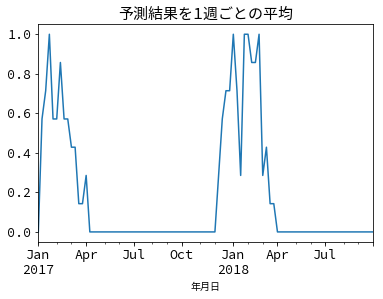

In [50]:
df_pred2018_mean.plot(title="予測結果を1週ごとの平均")